In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:86% !important;}
div.cell.code_cell.rendered{width:100%;}
div.CodeMirror {font-family:Consolas; font-size:12pt;}
div.output {font-size:15pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:12pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:15px;}
</style>
"""))

# 라이브러리 버젼 체크 : 충돌방지

In [2]:
import numpy as np
np.__version__

'1.23.5'

In [3]:
import sklearn
sklearn.__version__

'1.2.2'

In [4]:
import pandas as pd
pd.__version__

'1.5.3'

# 데이터 체크

In [5]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition_변환.csv')
df

,나이,회사와의마찰,출장,일당,부서,거리,학력,전공,사번,만족도,...,성인여부,야근,업무평가,주변평가,근무기준시간,스톡옵션레벨,경력,전년도교육출장횟수,워라밸,현회사근속년수
0,41,Yes,1~29회,1102,영업,1,2,사회과학계열,1,2,...,Y,Yes,보통,1,80,0,8,0,1,6
1,49,No,30회 이상,279,R&D,8,1,사회과학계열,2,3,...,Y,No,좋다,4,80,1,10,3,3,10
2,37,Yes,1~29회,1373,R&D,2,2,기타,4,4,...,Y,Yes,보통,2,80,0,7,3,3,0
3,33,No,30회 이상,1392,R&D,3,4,사회과학계열,5,4,...,Y,Yes,보통,3,80,0,8,3,3,8
4,27,No,1~29회,591,R&D,2,1,자연과학계열,7,1,...,Y,No,보통,4,80,1,6,3,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,30회 이상,884,R&D,23,2,자연과학계열,2061,3,...,Y,No,보통,3,80,1,17,3,3,5
1466,39,No,1~29회,613,R&D,6,1,자연과학계열,2062,4,...,Y,No,보통,1,80,1,9,5,3,7
1467,27,No,1~29회,155,R&D,4,3,사회과학계열,2064,2,...,Y,Yes,좋다,2,80,1,6,0,3,6
1468,49,No,30회 이상,1023,영업,2,3,자연과학계열,2065,4,...,Y,No,보통,4,80,0,17,3,2,9


In [6]:
df[df.isna().any(axis=1)] # 결측치 0건

,나이,회사와의마찰,출장,일당,부서,거리,학력,전공,사번,만족도,...,성인여부,야근,업무평가,주변평가,근무기준시간,스톡옵션레벨,경력,전년도교육출장횟수,워라밸,현회사근속년수


In [7]:
df.columns

Index(['나이', '회사와의마찰', '출장', '일당', '부서', '거리', '학력', '전공', '사번', '만족도', '성별',
       '시급', '참여프로젝트', '근속연차', '직급', '직업만족도', '결혼여부', '월급', '이직회수', '성인여부',
       '야근', '업무평가', '주변평가', '근무기준시간', '스톡옵션레벨', '경력', '전년도교육출장횟수', '워라밸',
       '현회사근속년수'],
      dtype='object')

In [8]:
x_col = ['나이','출장','부서','학력','참여프로젝트','직급','주변평가','경력','현회사근속년수']
y_col = ['업무평가']

# 독립변수 데이터 분포 점검
- 데이터의 형태가 심각하게 비정규성을 띄고
- 샘플 모델의 accuracy가 너무 낮다면
- 스케일링 통해 분포를 맞출 필요
- 또한 feature importance가 낮은데 불균등 분포여도 feature 제거 고려

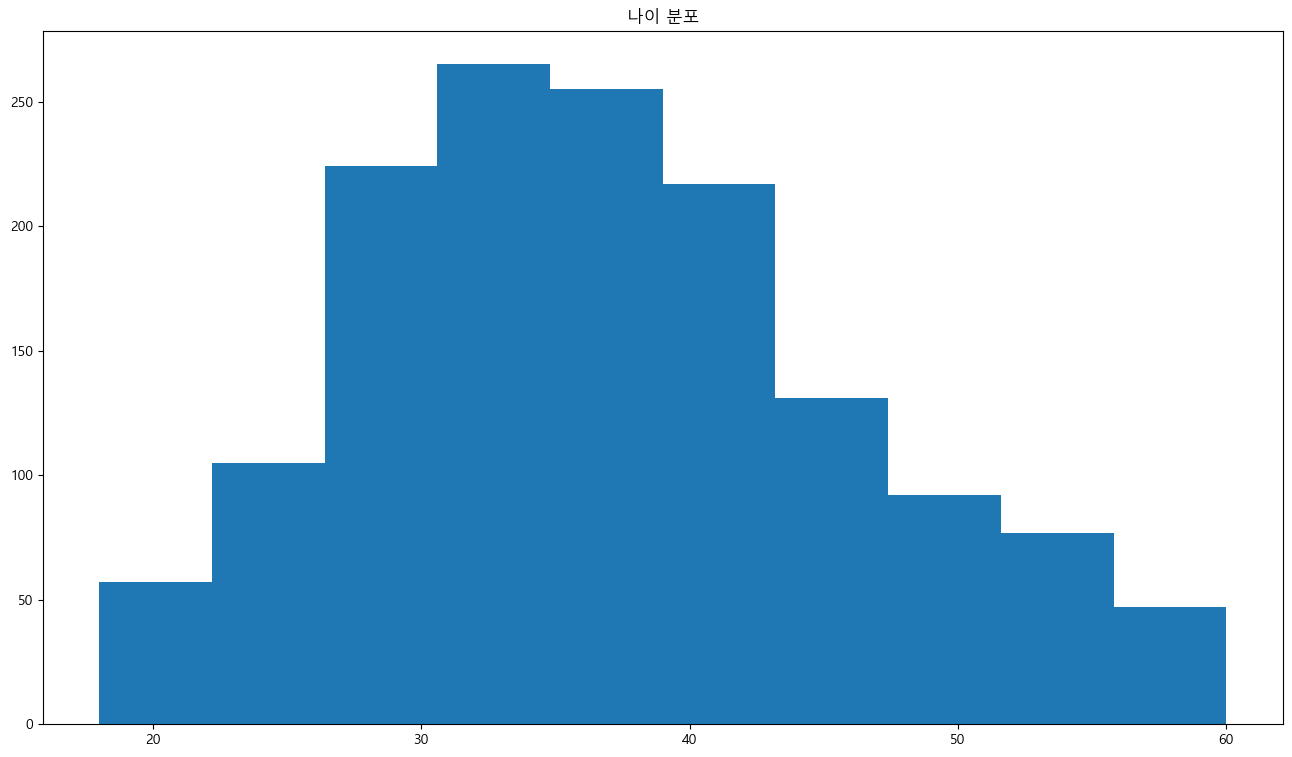

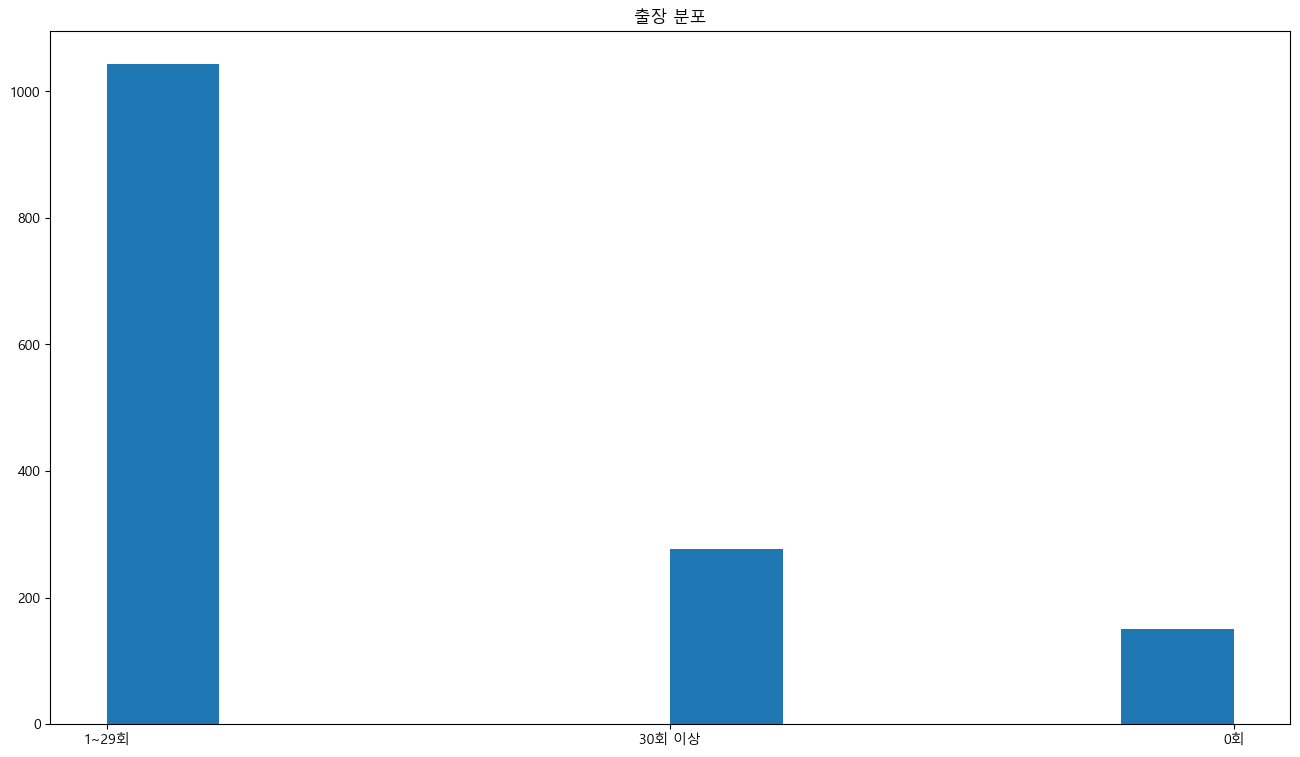

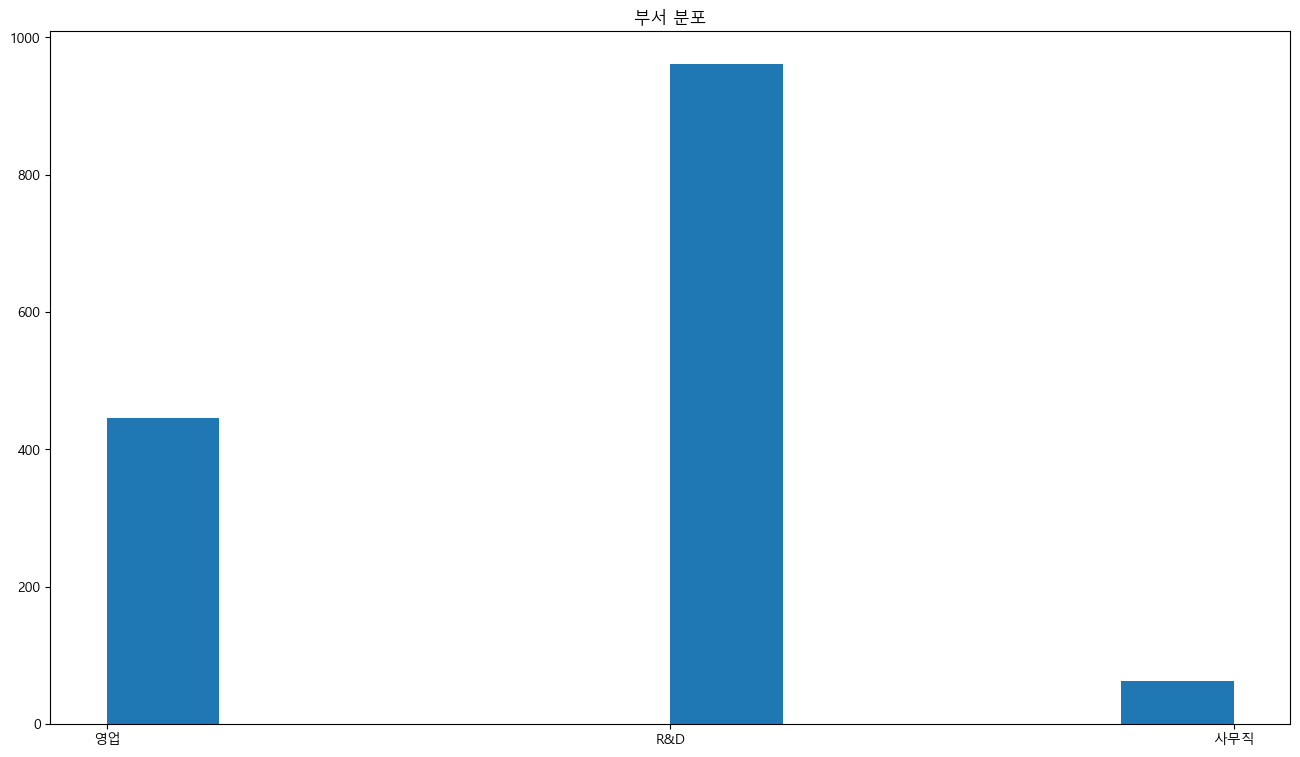

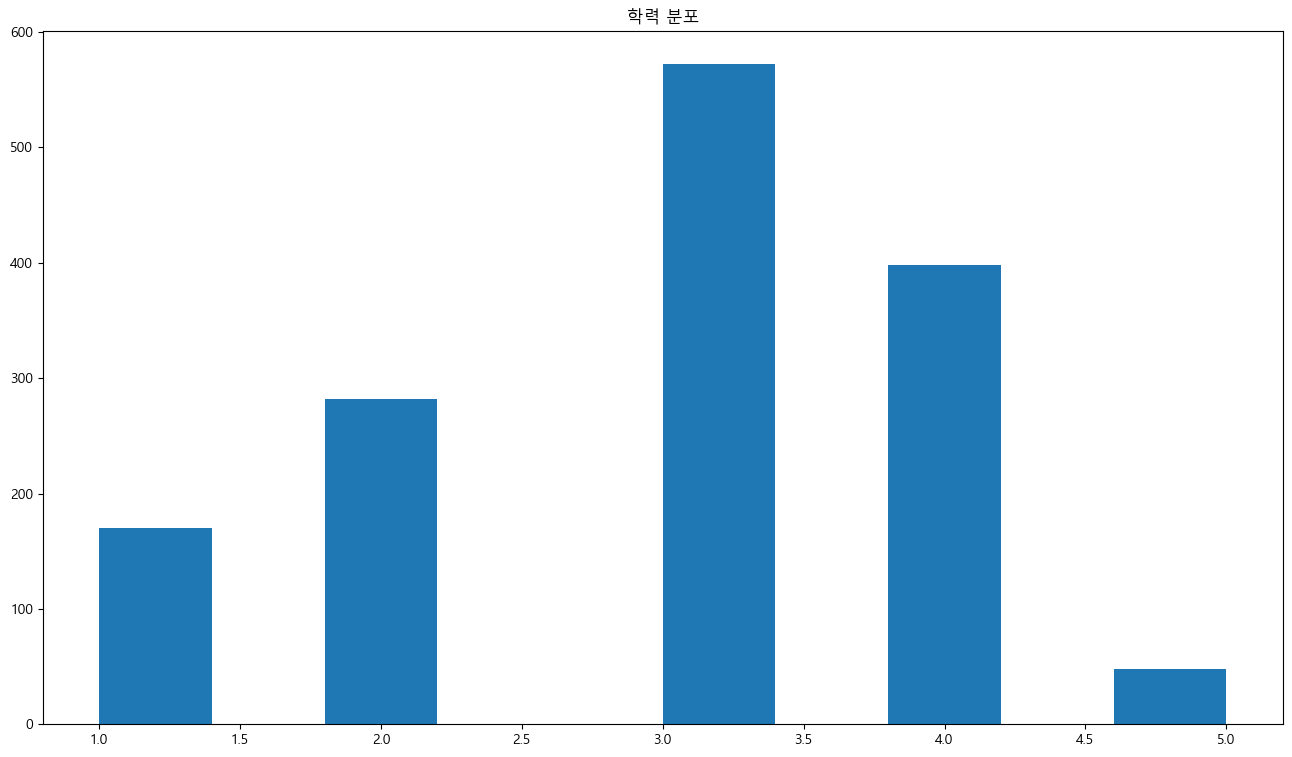

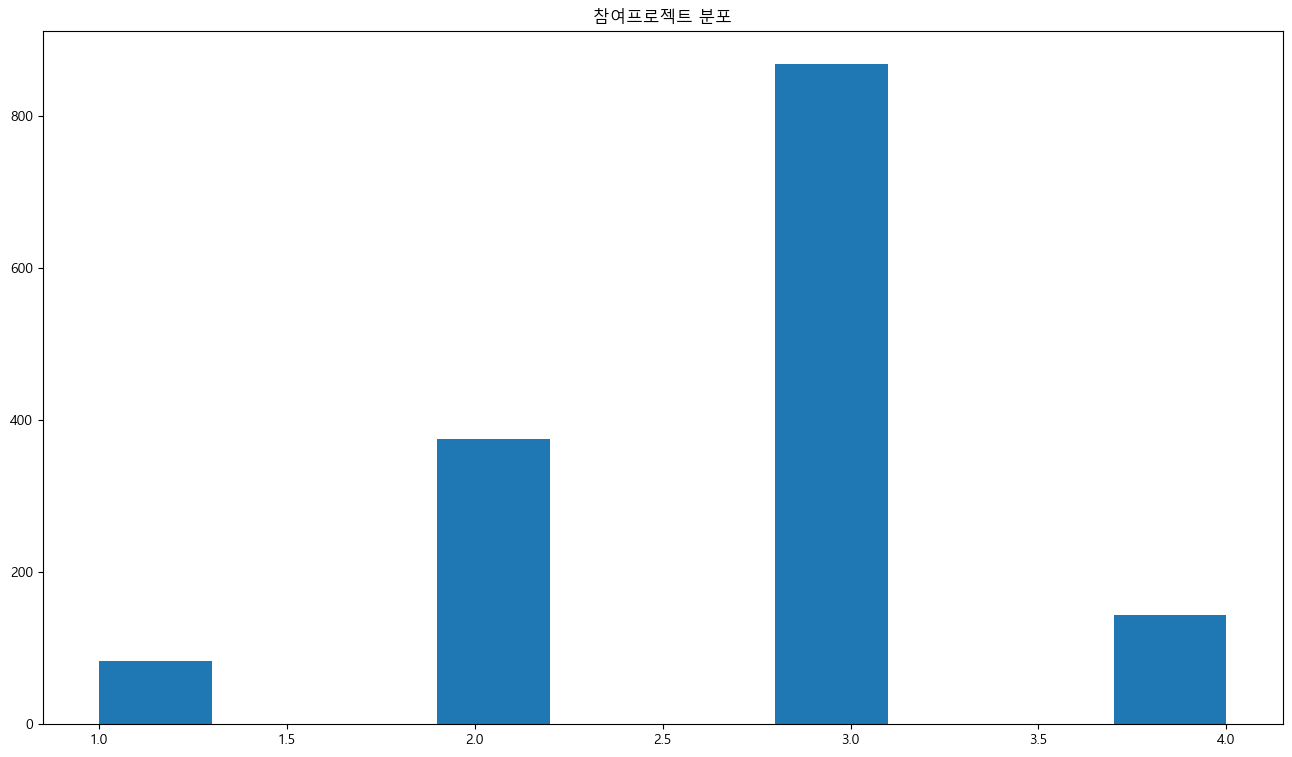

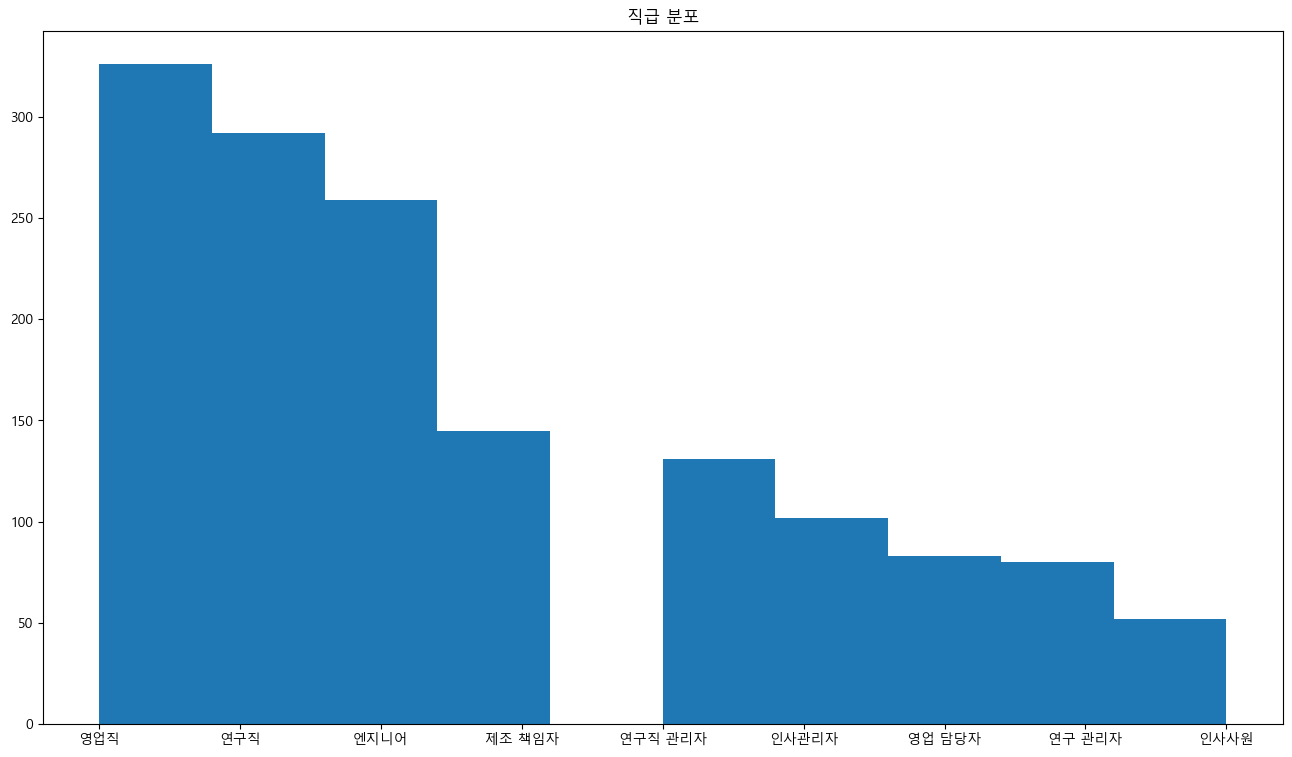

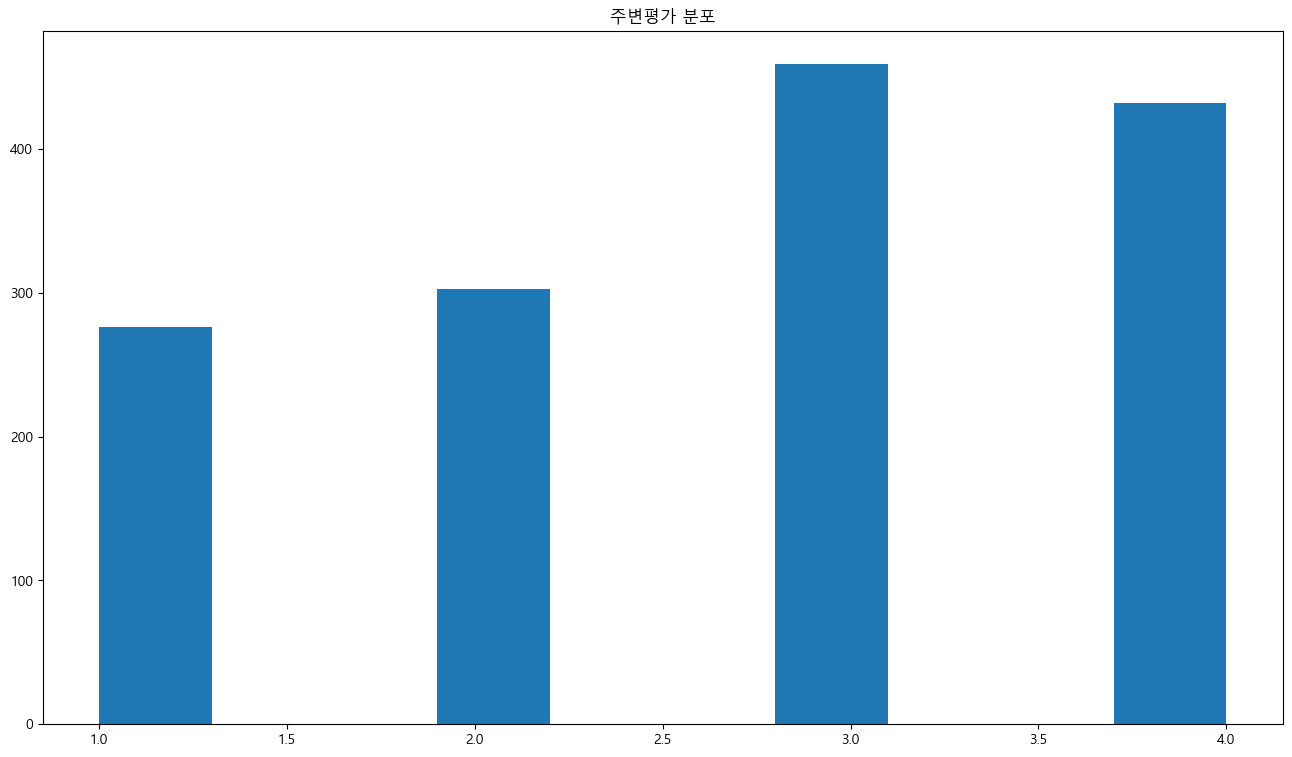

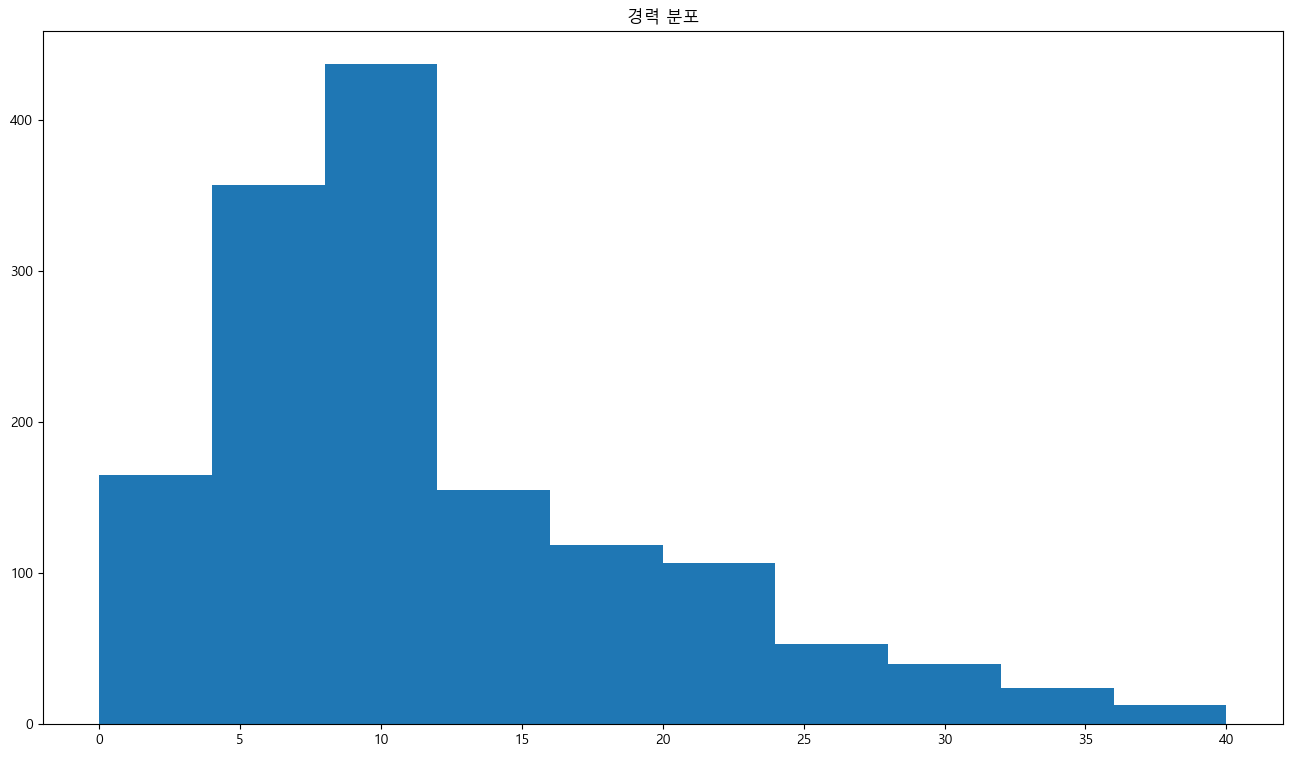

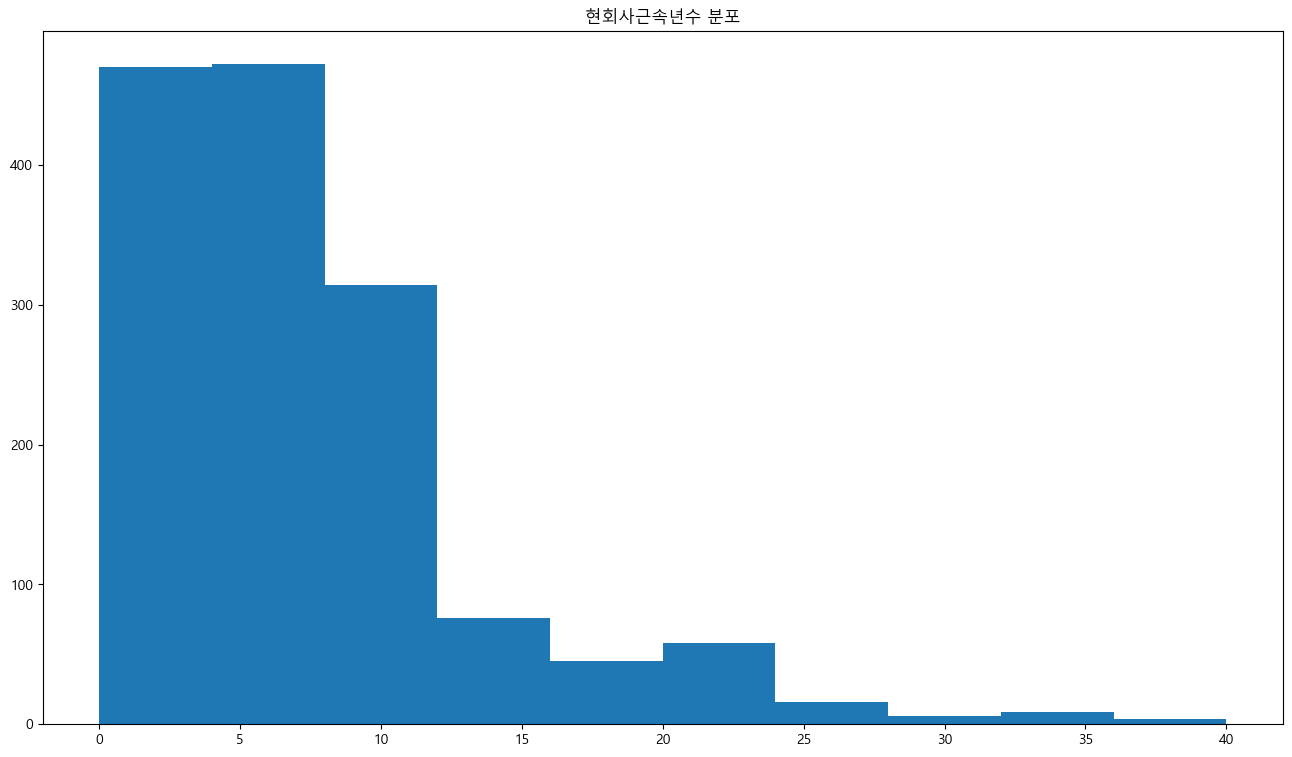

In [8]:
import matplotlib.pyplot as plt
plt.rc("font", family="Malgun Gothic")
for col in x_col :
    plt.figure(figsize=(16,9))
    plt.hist(df[col])
    plt.title(f"{col} 분포")
#     print(df[col].value_counts()) # 데이터 분포가 비정상적


# 타겟변수 분포 점검

In [9]:
df['업무평가'].value_counts()

업무평가
보통    1244
좋다     226
Name: count, dtype: int64

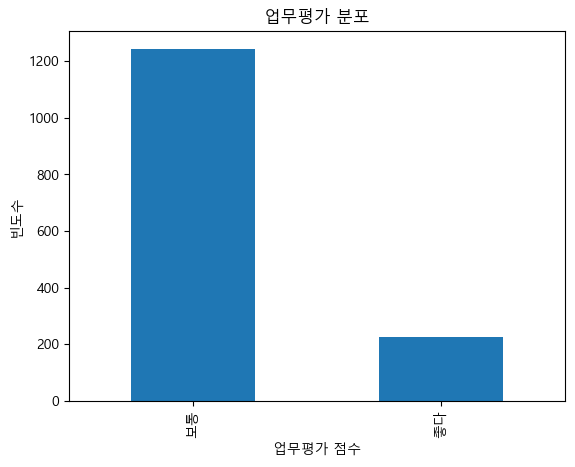

In [10]:
df['업무평가'].value_counts().sort_index().plot(kind='bar')
plt.title("업무평가 분포")
plt.xlabel("업무평가 점수")
plt.ylabel("빈도수")
plt.show()

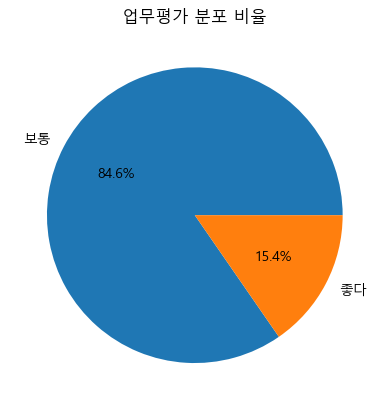

In [11]:
df['업무평가'].value_counts().sort_index().plot(kind='pie', autopct='%1.1f%%')
plt.title("업무평가 분포 비율")
plt.ylabel("")  # y축 라벨 제거
plt.show()

타겟변수의 분포가 불균등하여 원하는 결과가 도출되지 않으면 
- 데이터 추가 확보 : 불가능
- class_weight를 조정하거나
- smote 등
데이터를 강화해야함

# 데이터 전처리

In [12]:
# 데이터 우선 재체크
df_data = df[x_col + y_col]
df_data

,나이,출장,부서,학력,참여프로젝트,직급,주변평가,경력,현회사근속년수,업무평가
0,41,1~29회,영업,2,3,영업직,1,8,6,보통
1,49,30회 이상,R&D,1,2,연구직,4,10,10,좋다
2,37,1~29회,R&D,2,2,엔지니어,2,7,0,보통
3,33,30회 이상,R&D,4,3,연구직,3,8,8,보통
4,27,1~29회,R&D,1,3,엔지니어,4,6,2,보통
...,...,...,...,...,...,...,...,...,...,...
1465,36,30회 이상,R&D,2,4,엔지니어,3,17,5,보통
1466,39,1~29회,R&D,1,2,연구직 관리자,1,9,7,보통
1467,27,1~29회,R&D,3,4,제조 책임자,2,6,6,좋다
1468,49,30회 이상,영업,3,2,영업직,4,17,9,보통


In [13]:
# 학습셋, 시험셋 분리
from sklearn.model_selection import train_test_split
x = df_data[x_col]
y = df_data[y_col]
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.2,stratify=y)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((1176, 9), (294, 9), (1176, 1), (294, 1))

## 라벨인코딩

In [14]:
from sklearn.preprocessing import LabelEncoder
le_buisness = LabelEncoder() # 출장
le_depart = LabelEncoder() # 부서
le_manager = LabelEncoder() # 직급

In [15]:
X_train['출장'] = le_buisness.fit_transform(X_train['출장'])
X_train['부서'] = le_depart.fit_transform(X_train['부서'])
X_train['직급'] = le_manager.fit_transform(X_train['직급'])

## test set도 동일하게 수정

In [16]:
X_test['출장'] = le_buisness.transform(X_test['출장'])
X_test['부서'] = le_depart.transform(X_test['부서'])
X_test['직급'] = le_manager.transform(X_test['직급'])

# 모델 : RandomForeseClassifier
- RandomForestClassifier로 우선 sampling 후 feature_importance_ 점검
- 이후 class_weight = "balanced" 점검
- 결과에 따라 타 모델 점검 및 smote 여부 점검

In [17]:
np.array(X_train)

array([[35,  1,  0, ...,  3,  6,  5],
       [41,  1,  2, ...,  2, 10, 10],
       [43,  2,  2, ...,  4, 25, 25],
       ...,
       [41,  1,  0, ...,  4,  7,  5],
       [28,  1,  0, ...,  4,  4,  4],
       [39,  0,  0, ...,  2, 13,  6]])

In [18]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
rf_model = RandomForestClassifier()
history = rf_model.fit(np.array(X_train), np.array(Y_train).ravel())

In [19]:
history

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [20]:
# rf_model.feature_importances_
# X_train.columns

features = pd.DataFrame(np.c_[X_train.columns,rf_model.feature_importances_], columns=['feature_name','feature_importance'])
features

,feature_name,feature_importance
0,나이,0.220982
1,출장,0.056657
2,부서,0.026977
3,학력,0.102317
4,참여프로젝트,0.071147
5,직급,0.096624
6,주변평가,0.0898
7,경력,0.172642
8,현회사근속년수,0.162854


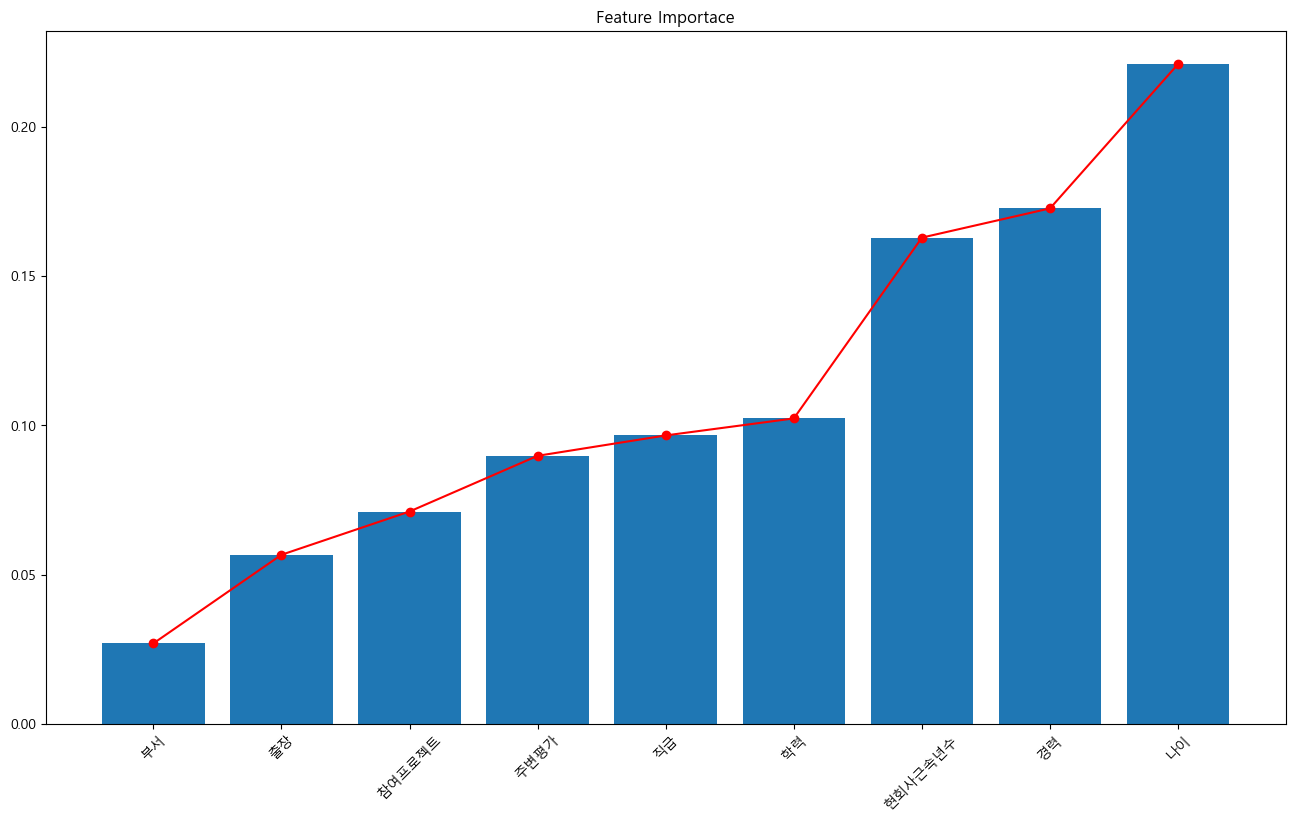

In [21]:
features.sort_values(by=['feature_importance'], ascending=True, inplace=True)
plt.figure(figsize=(16,9))
plt.plot(features.feature_name,features.feature_importance, color='red', marker='o')
plt.bar(features.feature_name,features.feature_importance)
plt.xticks(rotation=45)
plt.title("Feature Importace")
plt.show()

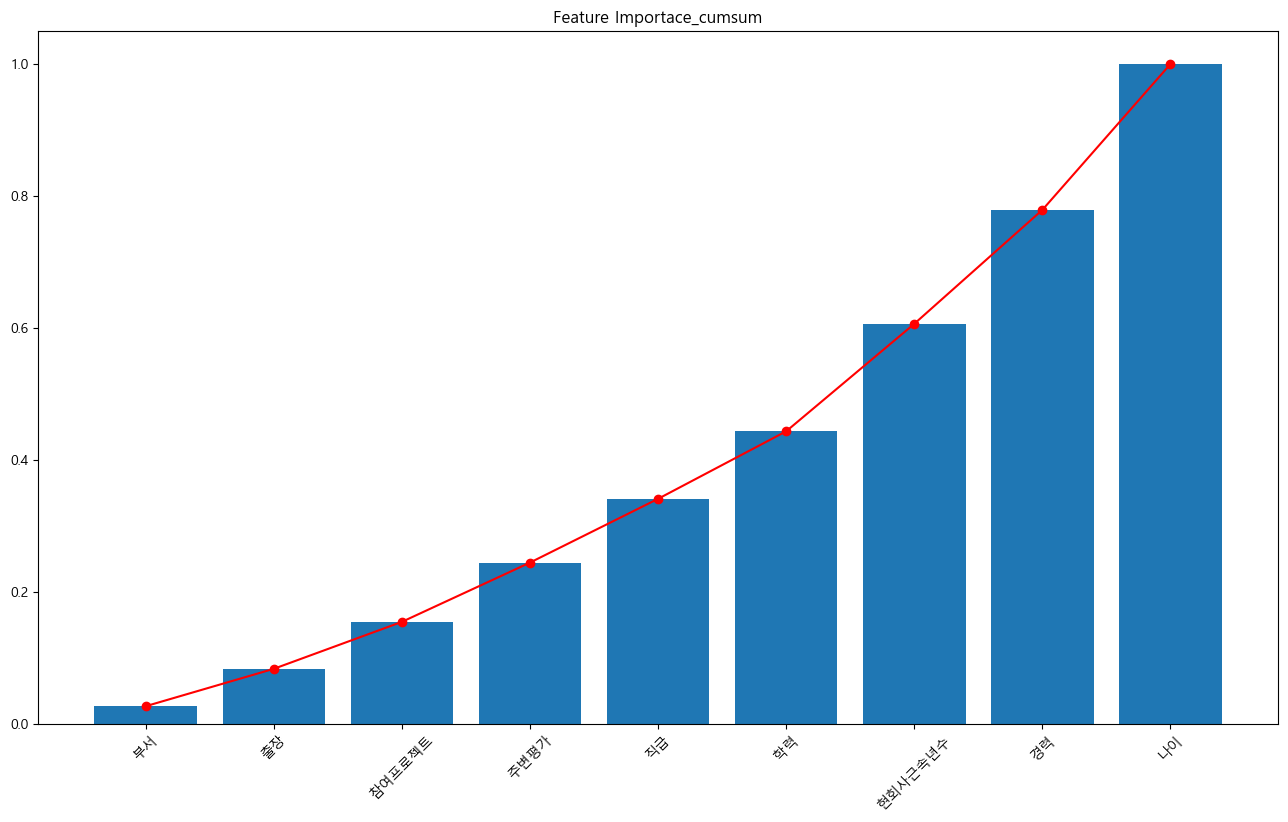

In [22]:
feature_y = np.cumsum(features.feature_importance)
# feature_y
features.sort_values(by=['feature_importance'], ascending=True, inplace=True)
plt.figure(figsize=(16,9))
plt.plot(features.feature_name,feature_y, color='red', marker='o')
plt.bar(features.feature_name,feature_y)
plt.xticks(rotation=45)
plt.title("Feature Importace_cumsum")
plt.show()

# feature_importance_ 확인 결과
1. cumsum 그래프가 꾸준히 상승하는 형태 : feature 종류의 부족일 수도
2. accuracy를 체크 후 모델 개선 방향 탐색

# 모델 결과

In [23]:
pred = rf_model.predict(np.array(X_test))
value = np.array(Y_test).ravel()

In [24]:
pred.shape, value.shape

((294,), (294,))

In [25]:
pd.crosstab(value,pred, rownames=['실제값'],colnames=['예측값'])

예측값,보통,좋다
실제값,,
보통,244,5
좋다,44,1


# 모델 : RandomForeseClassifier : class_weight = balanced
- RandomForestClassifier로 우선 sampling 후 feature_importance_ 점검
- 이후 class_weight = "balanced" 점검
- 결과에 따라 타 모델 점검 및 smote 여부 점검

In [39]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

rf_cl_balanced_model = RandomForestClassifier(class_weight={'보통':1,'좋다':1.75})
history = rf_cl_balanced_model.fit(np.array(X_train), np.array(Y_train).ravel())

In [40]:
history

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [41]:
pred = rf_cl_balanced_model.predict(np.array(X_test))
Y_test, pred

(     업무평가
 1086   보통
 1256   보통
 1205   보통
 1432   좋다
 1037   보통
 ...   ...
 733    보통
 181    보통
 448    보통
 81     보통
 598    보통
 
 [294 rows x 1 columns],
 array(['보통', '보통', '보통', '보통', '보통', '보통', '보통', '보통', '보통', '보통', '보통',
        '보통', '보통', '보통', '보통', '보통', '보통', '보통', '보통', '보통', '보통', '보통',
        '보통', '보통', '보통', '좋다', '보통', '보통', '보통', '보통', '보통', '보통', '보통',
        '보통', '보통', '보통', '보통', '보통', '보통', '보통', '보통', '보통', '보통', '보통',
        '보통', '보통', '보통', '보통', '보통', '좋다', '보통', '보통', '보통', '보통', '보통',
        '보통', '보통', '보통', '보통', '보통', '보통', '보통', '보통', '보통', '보통', '보통',
        '보통', '보통', '보통', '보통', '보통', '보통', '보통', '보통', '보통', '보통', '보통',
        '보통', '보통', '보통', '보통', '보통', '보통', '보통', '보통', '보통', '보통', '보통',
        '보통', '보통', '보통', '보통', '보통', '보통', '보통', '보통', '보통', '보통', '보통',
        '보통', '보통', '보통', '보통', '보통', '보통', '보통', '보통', '보통', '보통', '보통',
        '보통', '보통', '좋다', '보통', '보통', '보통', '보통', '보통', '보통', '보통', '보통',
        '보통', '보통', '보통', '

In [42]:
pd.crosstab(np.array(Y_test).ravel(),pred,rownames=['실제값'],colnames=['예측값'])

예측값,보통,좋다
실제값,,
보통,245,4
좋다,44,1


In [72]:
Y_test[Y_test['업무평가']=='보통'].value_counts() # 좋다 예측값 0건

업무평가
보통      249
Name: count, dtype: int64

In [73]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(Y_test, pred)

In [74]:
acc # 84.7% 정확도

0.8469387755102041

In [75]:
from sklearn.metrics import classification_report
report = classification_report(Y_test, pred)
print(report)

              precision    recall  f1-score   support

          보통       0.85      1.00      0.92       249
          좋다       0.50      0.02      0.04        45

    accuracy                           0.85       294
   macro avg       0.67      0.51      0.48       294
weighted avg       0.80      0.85      0.78       294



# class_weight = "balanced" 이후에도 정확도는 84.7%
- 무엇보다 업무평가 4(뛰어남)에 대한 검증력이 약함
- 그런데 이게 잘 맞춰야하나에 대한 의문 : precision이 높아야하는 거 아닌가?